In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('C:\\Users\\CVR\\Desktop\\6626\\GlobalLandTemperaturesByCity.csv')
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
#line plot: how has the avg temp in city changed over years x-axis=year and y-axis=avg temp
#Bar plot:which countries had the highest average temperatures in dataset z-axis=countries ,y-axis=Average Tempearture
#histogram:avg distribution of temp across al data x-axix='temperature ranges' y-axis:frequency
#scatter plot find correlation between x-axis AverageTemperature,y-axis=Temperature Uncertainity
#box plot:spread of temperatures for a specific country over given period x-axis=years or countries y-axis=Average Temperature

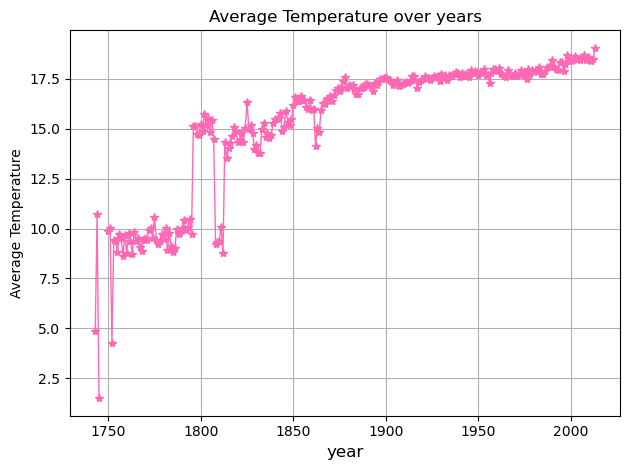

In [42]:
data['dt']=pd.to_datetime(data['dt'])
data['year']=data['dt'].dt.year
y=data.groupby('year')['AverageTemperature'].mean()
plt.plot(y.index,y.values,color='hotpink',linestyle='solid',linewidth=1,marker="*")
plt.title("Average Temperature over years")
plt.xlabel("year",fontsize=12)
plt.ylabel("Average Temperature")
plt.grid(True)
plt.tight_layout()
plt.show()

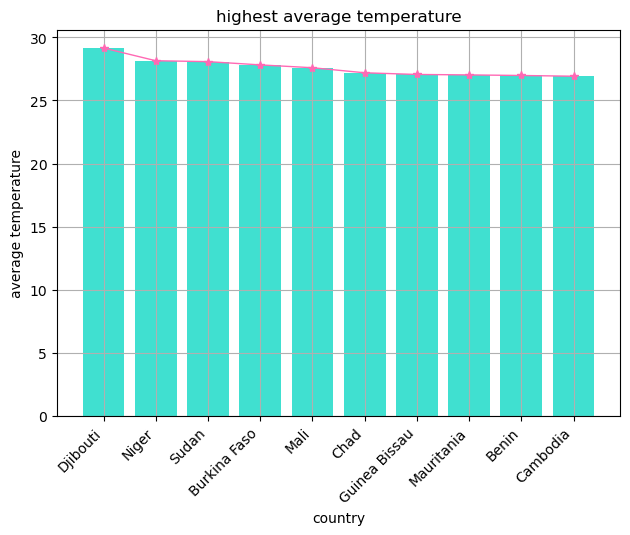

In [44]:
x = data['Country']
y = data.groupby('Country')['AverageTemperature'].mean()
y=y.sort_values(ascending=False).head(10)
plt.bar(y.index,y.values,color='turquoise',linewidth=3)
plt.plot(y.index,y.values,color='hotpink',linestyle='solid',linewidth=1,marker="*")
plt.xlabel("country")
plt.ylabel("average temperature")
plt.title("highest average temperature")
plt.tight_layout()
plt.xticks(rotation=45,ha='right')
plt.grid(True)
plt.show()

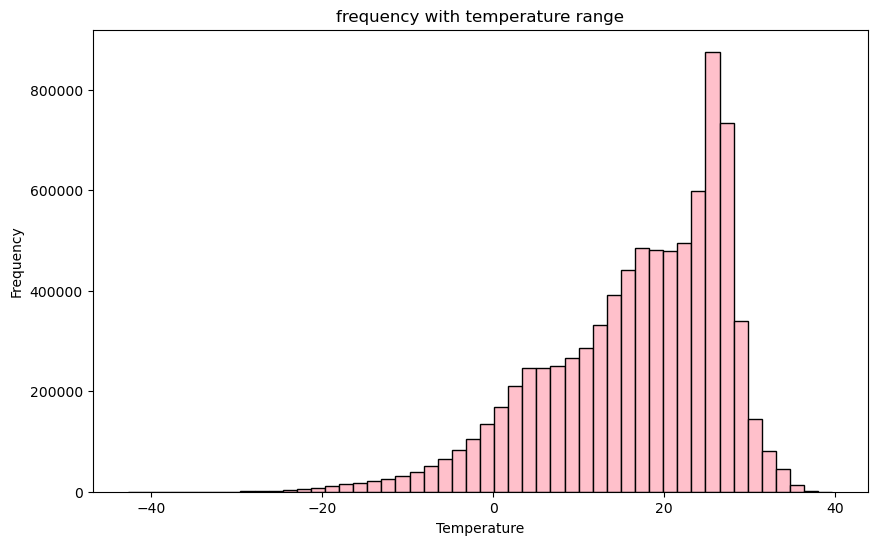

In [55]:
x=data['AverageTemperature'].dropna()
plt.figure(figsize=(10,6))
plt.hist(x,bins=50,color='pink',edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('frequency with temperature range')
plt.show()

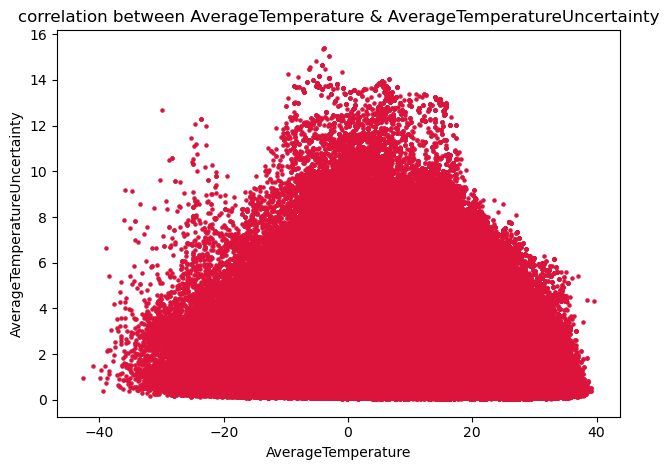

In [72]:
x=data['AverageTemperature'].dropna()
y=data['AverageTemperatureUncertainty'].dropna()
plt.scatter(x,y,color='crimson',marker='.',s=20)
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.title('correlation between AverageTemperature & AverageTemperatureUncertainty',alpha=1)
plt.tight_layout()
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_9408\804843949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['year'] = india_data['dt'].dt.year


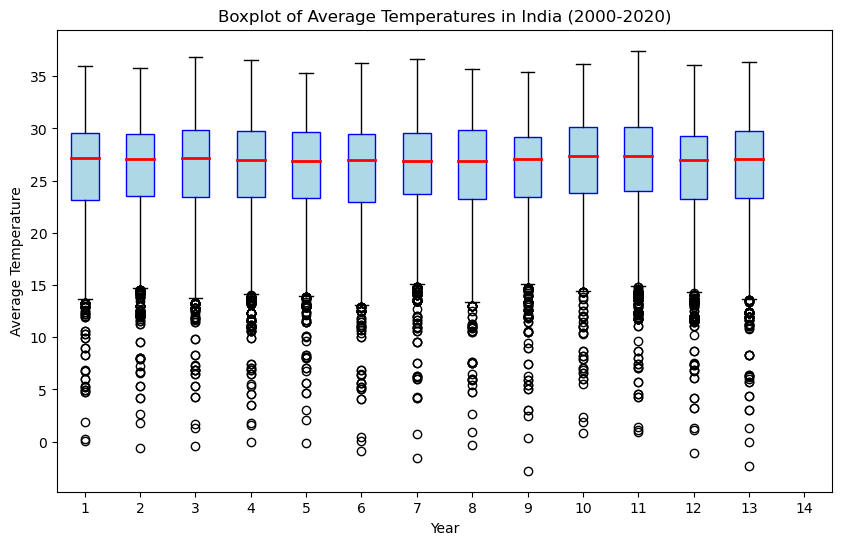

In [78]:

data['dt'] = pd.to_datetime(data['dt'])
india_data=data[data['Country']=='India'].copy()
india_data = data[(data['Country'] == 'India') & (data['dt'].dt.year >= 2000) & (data['dt'].dt.year <= 2020)]
india_data['year'] = india_data['dt'].dt.year
grouped_data = india_data.groupby('year')['AverageTemperature'].apply(list)
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_data, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2))
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Boxplot of Average Temperatures in India (2000-2020)')


plt.show()
